In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [0]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers


In [0]:


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
print('Training data')
print('Shape of train_images:' ,train_images.shape)
print('Shape of train_labels:' ,train_labels.shape)
print('Shape of test_images:' ,test_images.shape)
print('Shape of test_labels:', test_labels.shape)


Training data
Shape of train_images: (50000, 32, 32, 3)
Shape of train_labels: (50000, 1)
Shape of test_images: (10000, 32, 32, 3)
Shape of test_labels: (10000, 1)


In [0]:

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:

REG=0.05
model = models.Sequential()
model.add(layers.Conv2D(512, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(REG), input_shape=(32, 32, 3)))
model.add(layers.Conv2D(512, (3, 3),kernel_regularizer=regularizers.l2(REG), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(1024, (3, 3),kernel_regularizer=regularizers.l2(REG), activation='relu'))
model.add(layers.Conv2D(1024, (3, 3),kernel_regularizer=regularizers.l2(REG), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 512)       14336     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 512)       2359808   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 512)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 1024)      4719616   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 1024)      9438208   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 1024)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)            

In [0]:


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
from keras.callbacks import Callback, ModelCheckpoint

checkpoint = ModelCheckpoint(
    '/content/cipher_decay05.h5', 
    monitor='val_acc', 
    verbose=0, 
    save_best_only=True, 
    save_weights_only=False
)

In [10]:
history = model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_split=0.2, callbacks=[checkpoint])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/25





40000/40000 [==============================] - 68s 2ms/step - loss: 10.9537 - acc: 0.2791 - val_loss: 2.0337 - val_acc: 0.3613
Epoch 2/25
40000/40000 [==============================] - 58s 1ms/step - loss: 1.9598 - acc: 0.3665 - val_loss: 1.9040 - val_acc: 0.3704
Epoch 3/25
40000/40000 [==============================] - 58s 1ms/step - loss: 1.8605 - acc: 0.3835 - val_loss: 1.7969 - val_acc: 0.3978
Epoch 4/25
40000/40000 [==============================] - 58s 1ms/step - loss: 1.8116 - acc: 0.3925 - val_loss: 1.8352 - val_acc: 0.3779
Epoch 5/25
40000/40000 [==============================] - 58s 1ms/step - loss: 1.7783 - acc: 0.4011 - val_loss: 1.7850 - val_acc: 0.3973
Epoch 6/25
40000/40000 [==============================] - 58s 1ms/step - loss: 1.7519 - acc: 0.4084 - val_loss: 1.7172 - val_acc: 0.4239
Epoch 7/25
40000/40000 [=

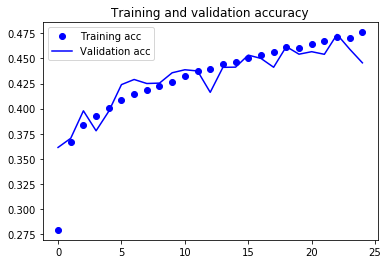

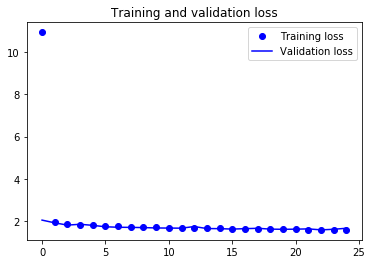

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
 model = keras.models.load_model('/content/cipher_decay05.h5')


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 5s 549us/step


In [14]:
test_acc

0.4731

In [15]:
test_loss

1.5645763053894044

In [16]:
import numpy as np
yActualVal=np.argmax(test_labels,axis=1)
yActualVal


array([3, 8, 8, ..., 5, 1, 7])

In [17]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

yPredictedVal = model.predict_classes(test_images)
yPredictedVal


array([3, 1, 1, ..., 5, 0, 7])

In [18]:
print(classification_report(y_true=yActualVal, y_pred=yPredictedVal))


              precision    recall  f1-score   support

           0       0.57      0.50      0.53      1000
           1       0.58      0.67      0.62      1000
           2       0.46      0.28      0.35      1000
           3       0.35      0.27      0.30      1000
           4       0.41      0.33      0.36      1000
           5       0.39      0.38      0.38      1000
           6       0.48      0.56      0.52      1000
           7       0.42      0.62      0.50      1000
           8       0.52      0.54      0.53      1000
           9       0.50      0.59      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.46     10000
weighted avg       0.47      0.47      0.46     10000



In [19]:
print(confusion_matrix(y_true=yActualVal, y_pred=yPredictedVal))


[[497  66  25  11  28  21  16  47 203  86]
 [ 29 665   8  11   0  11  16  32  74 154]
 [ 72  24 277  73 151 108  96 134  41  24]
 [ 24  29  56 268  65 197 162 109  27  63]
 [ 42  12  68  54 327  99 153 205  23  17]
 [ 17  17  83 152  65 377  71 164  24  30]
 [  4  17  51 107  93  48 564  72   7  37]
 [ 23  22  24  54  51  77  48 618  23  60]
 [142 101   9  18  15  17  10  24 543 121]
 [ 26 186   4  20   2  14  28  50  75 595]]
